## Data Analysis and Prediction Model by Avishkar, 4th Sem, Branch (CSE-AIML)

- I hope this analysis reflects the strategy as well as the ideology behind forming the model. The models are based on the fundamental ML and DL concepts which provide an insight as to how advanced ML models can be created by improving such basic models.

- I have taken help from various sources to perform the data analysis and design the models. This project proved to be a great learning adventure, and as it turns out I've learnt so much in terms of learning so many new areas of AI/ML/DL ,python, statistics etc, that it would benifit me greatly in the future. I'm confident about that.

- Thank you GDSC for the opportunity

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [183]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

In [184]:
df = pd.concat([train_df, test_df])

In [185]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [186]:
df.head(30)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8167 entries, 0 to 98
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8167 non-null   int64  
 1   Gender           8167 non-null   object 
 2   Ever_Married     8027 non-null   object 
 3   Age              8167 non-null   int64  
 4   Graduated        8089 non-null   object 
 5   Profession       8042 non-null   object 
 6   Work_Experience  7327 non-null   float64
 7   Spending_Score   8167 non-null   object 
 8   Family_Size      7829 non-null   float64
 9   Var_1            8089 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 765.7+ KB


In [188]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8167.000000,8167.000000,7327.000000,7829.000000
mean,463426.625199,43.552222,2.634639,2.849662
std,2622.946835,16.778854,3.403699,1.530730
min,458982.000000,18.000000,0.000000,1.000000
25%,461161.500000,30.000000,0.000000,2.000000
50%,463415.000000,41.000000,1.000000,3.000000
75%,465717.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Data Cleaning & Analysis (EDA)

In [189]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         125
Work_Experience    840
Spending_Score       0
Family_Size        338
Var_1               78
Segmentation        99
dtype: int64

In [190]:
[features for features in df.columns if df[features].isnull().sum()>0] #list
# which all columns have Nan values

['Ever_Married',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Family_Size',
 'Var_1',
 'Segmentation']

In [191]:
# dropping the rows having NaN values
df = df.dropna()

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender           6665 non-null   object 
 2   Ever_Married     6665 non-null   object 
 3   Age              6665 non-null   int64  
 4   Graduated        6665 non-null   object 
 5   Profession       6665 non-null   object 
 6   Work_Experience  6665 non-null   float64
 7   Spending_Score   6665 non-null   object 
 8   Family_Size      6665 non-null   float64
 9   Var_1            6665 non-null   object 
 10  Segmentation     6665 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 624.8+ KB


In [193]:
df['Segmentation'].value_counts()

D    1757
C    1720
A    1616
B    1572
Name: Segmentation, dtype: int64

In [194]:
def plot_pie(feature):
    plot_data = df.groupby([feature, 'Segmentation'])[feature].agg({'count'}).reset_index()

    fig = px.sunburst(plot_data, path = [feature, 'Segmentation'], values = 'count', color = feature, 
                      title = 'Affect of %s on Customer Segmentation'%feature, width = 600, height = 600)

    fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', 
                      title_font_size = 22, title_x = 0.5)

    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

In [195]:
for feature in ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']:
    plot_pie(feature)

In [196]:
def plot_numerical(feature, figsize=None):
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(df[df['Segmentation']=='A'][feature])
    sns.kdeplot(df[df['Segmentation']=='B'][feature])
    sns.kdeplot(df[df['Segmentation']=='C'][feature])
    sns.kdeplot(df[df['Segmentation']=='D'][feature])

    fig.legend(labels=['Segmentation A', 'Segmentation B', 'Segmentation C', 'Segmentation D'])
    plt.title('Based on %s'%feature)
    plt.show()

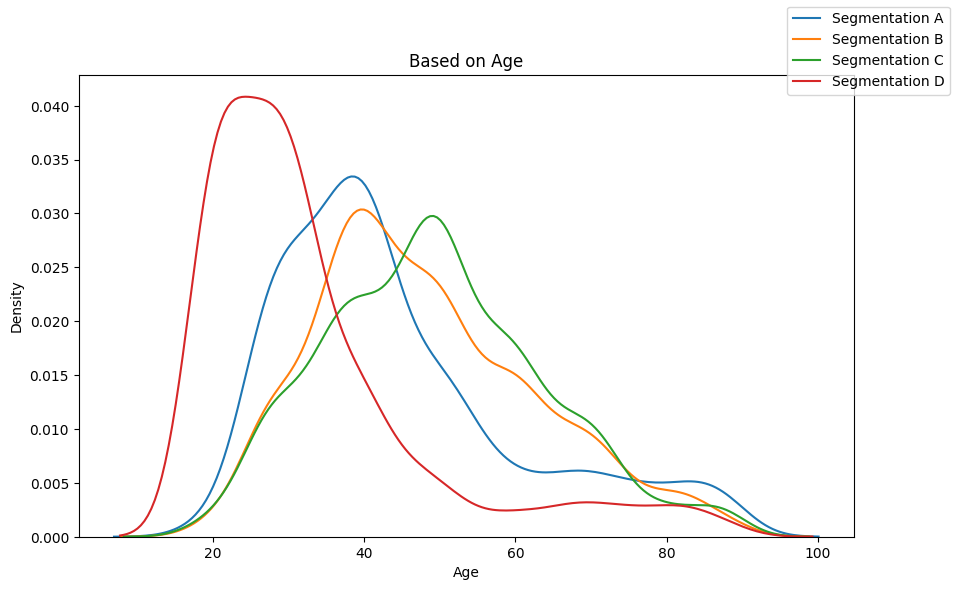

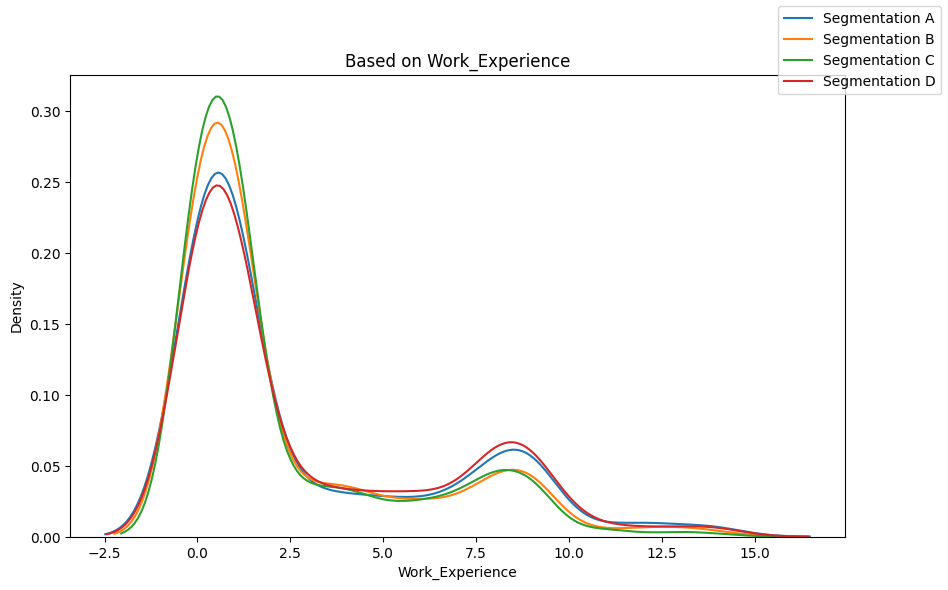

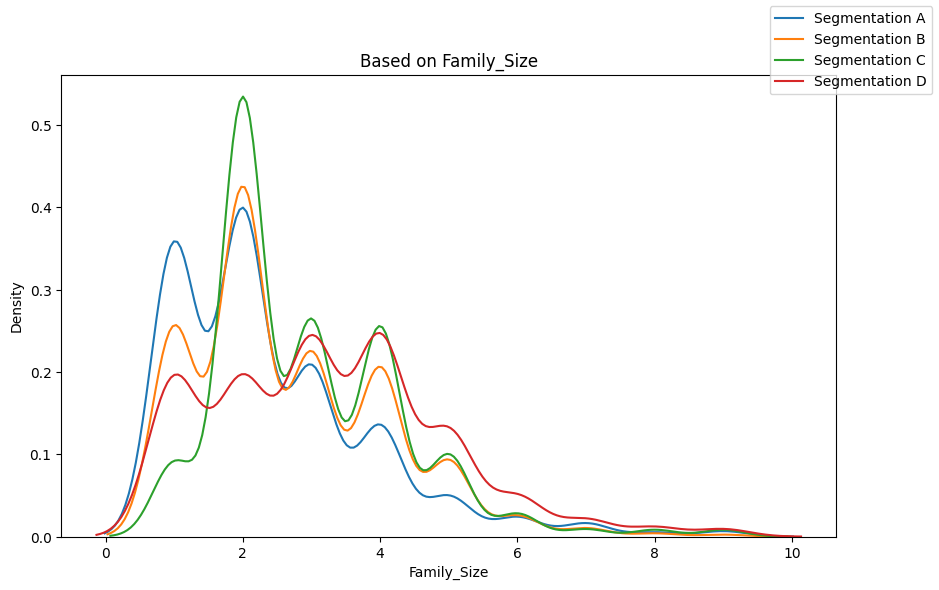

In [197]:
for feature in ['Age', 'Work_Experience', 'Family_Size']:
    plot_numerical(feature)

# Observations-
- Ever_Married - UnMarried customers are usually in segment D while married are in segment A, B or C
- Graduated - Graduated customers are usually in segment A, B or C while Ungraduated are in segment D
- Profession - Customers in healthcare & marketing are mostly in segment D, Artist & engineers are usually in A, B or C
- Spending_Score - Usually 'Low' spenders are in segment A or D while 'high' and 'average' spenders are in segment B or C
- Age - <30 are in segment D, 30-40 or >70 are in segment A while 45-70 are in segment C
- Work_Experience - <2 are in segment C while 6-11 are in segment A & D
- Family_Size - <1 are in segment A, 1-3 are in Segment C and 4+ in segment D

In [198]:
print("Gender: ", df['Gender'].unique())
print("Ever_Married: ", df['Ever_Married'].unique())
print("Graduated: ", df['Graduated'].unique())
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Ever_Married'] = df['Ever_Married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Graduated'] = df['Graduated'].apply(lambda x: 1 if x == 'Yes' else 0)

Gender:  ['Male' 'Female']
Ever_Married:  ['No' 'Yes']
Graduated:  ['No' 'Yes']


In [199]:
print(df['Spending_Score'].unique())
df['Spending_Score'].replace(to_replace = 'Low', value = 0, inplace = True)
df['Spending_Score'].replace(to_replace = 'Average', value = 1, inplace = True)
df['Spending_Score'].replace(to_replace = 'High', value = 2, inplace = True)

['Low' 'High' 'Average']


In [200]:
print(df['Var_1'].unique())
df['Var_1'].replace(to_replace = 'Cat_1', value = 1, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_2', value = 2, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_3', value = 3, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_4', value = 4, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_5', value = 5, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_6', value = 6, inplace = True)
df['Var_1'].replace(to_replace = 'Cat_7', value = 7, inplace = True)

['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' 'Cat_5']


In [201]:
print(df['Segmentation'].unique())
df['Segmentation'].replace(to_replace = 'A', value = 0, inplace = True)
df['Segmentation'].replace(to_replace = 'B', value = 1, inplace = True)
df['Segmentation'].replace(to_replace = 'C', value = 2, inplace = True)
df['Segmentation'].replace(to_replace = 'D', value = 3, inplace = True)

['D' 'B' 'C' 'A']


In [202]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,4,3
2,466315,0,1,67,1,Engineer,1.0,0,1.0,6,1
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,6,1
5,461319,1,1,56,0,Artist,0.0,1,2.0,6,2
6,460156,1,0,32,1,Healthcare,1.0,0,3.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,1,1,41,1,Artist,0.0,2,5.0,6,1
8064,464685,1,0,35,0,Executive,3.0,0,4.0,4,3
8065,465406,0,0,33,1,Healthcare,1.0,0,1.0,6,3
8066,467299,0,0,27,1,Healthcare,1.0,0,4.0,6,1


In [109]:
segment_values=df.Segmentation.value_counts().values

In [110]:
segments = df.Segmentation.value_counts().index

([<matplotlib.patches.Wedge at 0x20bd4bef490>,
 [Text(0.7438444731896444, 0.8103674473380704, '3'),
  Text(-0.8591133317133327, 0.6869674543036354, '2'),
  Text(-0.6855492379128181, -0.860245454737864, '0'),
  Text(0.811593432107099, -0.7425066336138822, '1')],
 [Text(0.4057333490125333, 0.44201860763894746, '26.36%'),
  Text(-0.468607271843636, 0.37470952052925566, '25.81%'),
  Text(-0.3739359479524462, -0.4692247934933803, '24.25%'),
  Text(0.4426873266038721, -0.40500361833484483, '23.59%')])

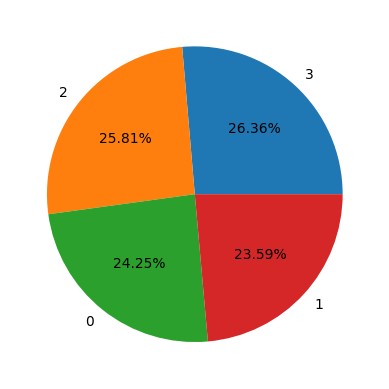

In [144]:
plt.pie(segment_values,labels=segments,autopct='%1.2f%%')

Observation - All segments have nearly same %age in its own

In [203]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,Healthcare,1.0,0,4.0,4,3
2,466315,0,1,67,1,Engineer,1.0,0,1.0,6,1
3,461735,1,1,67,1,Lawyer,0.0,2,2.0,6,1
5,461319,1,1,56,0,Artist,0.0,1,2.0,6,2
6,460156,1,0,32,1,Healthcare,1.0,0,3.0,6,2


Data pre processing

In [204]:
x = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']].values
x

array([[ 1.,  0., 22., ...,  0.,  4.,  4.],
       [ 0.,  1., 67., ...,  0.,  1.,  6.],
       [ 1.,  1., 67., ...,  2.,  2.,  6.],
       ...,
       [ 0.,  0., 33., ...,  0.,  1.,  6.],
       [ 0.,  0., 27., ...,  0.,  4.,  6.],
       [ 1.,  1., 37., ...,  1.,  3.,  4.]])

In [205]:
y = df.iloc[:, 10].values
y

array([3, 1, 1, ..., 3, 1, 1], dtype=int64)

In [206]:
df.shape

(6665, 11)

## Splitting Training and Testing Data

In [207]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [208]:
print(x_train.shape)

(4665, 8)


# Model 1 - using Logistic Regression
- In regression analysis, logistic regression is estimating the parameters of a logistic model (the coefficients in the linear combination)
- In simple words, on graph with points plotted, we try to plot a best fitting curve - that passes through all the points. And even though it might not go through "all" the points, it gives us a pretty good idea of prediticting where a certain point might lie on the curve

In [209]:
model = LogisticRegression(max_iter = 600)
model.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [210]:
y_pred_lr = model.predict(x_test)

In [211]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.4515


### Accuracy of Model 1 = 45.15%

In [212]:
cr = classification_report(y_test, y_pred_lr)

print("\t\tClassification Report\n" + "--"*28 + "\n", cr)

		Classification Report
--------------------------------------------------------
               precision    recall  f1-score   support

           0       0.38      0.35      0.37       496
           1       0.36      0.10      0.16       501
           2       0.44      0.64      0.52       521
           3       0.53      0.72      0.61       482

    accuracy                           0.45      2000
   macro avg       0.43      0.45      0.41      2000
weighted avg       0.43      0.45      0.41      2000



## Confusion Matrix 
- A confusion matrix gives us a clear picture regarding the accuracy of our model. It related the "predicted outcome" with the "actual outcome"
- libraries like Seaborn allow us to view these matrices using Heatmaps

In [213]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[174  35 138 149]
 [126  50 246  79]
 [ 73  39 331  78]
 [ 84  14  36 348]]


<AxesSubplot: >

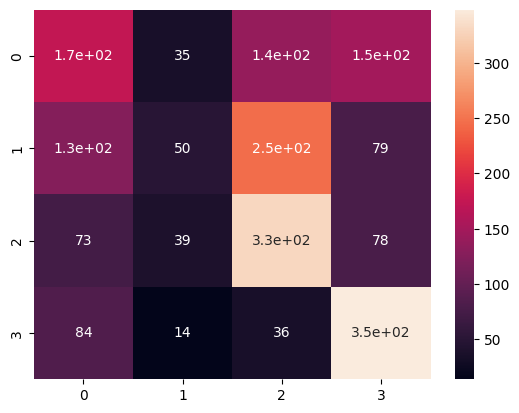

In [214]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm,annot=True)

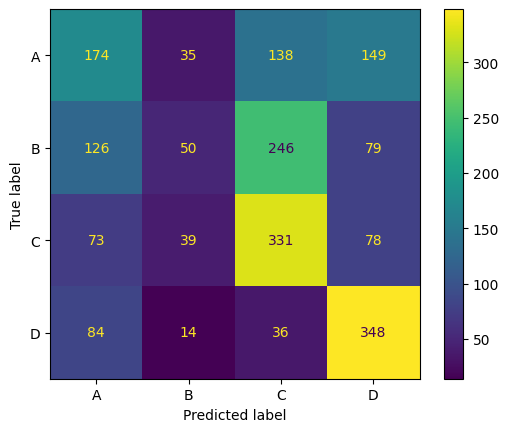

In [215]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred_lr), display_labels=['A', 'B', 'C', 'D'])
cm_display.plot()
plt.show()

# Model 2 - Deep Learning

In [166]:
import keras
from keras import Sequential, Input, Model
from keras.layers import Dense, Dropout

In [178]:
# Initialize the constructor
model = Sequential()
# Add an input layer 
# arguemtns of dense: output shape, activation, input shape
# activation(define the output function) = [relu', 'tanh']
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dropout(0.3))
# Add one hidden layer 
# after first layer no need to give input shape
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
# Add an output layer 
# activation = [regression: 'linear', binary classification: 'sigmoid', multiclass: 'softmax']
# threshold: >0 or <0
# sigmoid: 1/(1+e^-x), usually applied in output layer
# rectifier: max(x,0), usually applied in hidden layer: relu
# hyperbolic tangent tanh: (1-e^-2x)/(1+e^-2x)
model.add(Dense(4, activation='softmax'))

# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# loss = [regression: 'mse', binary: 'binary_crossentropy', multi: 'categorical_crossentropy']
model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy']
         )

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                576       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                

In [179]:
fit = model.fit(x_train, pd.get_dummies(y_train), epochs=150, batch_size=500, verbose=1, validation_split=0.2)

Epoch 1/150
8/8 [==============================] - 1s 41ms/step - loss: 4.1631 - accuracy: 0.2583 - val_loss: 1.4687 - val_accuracy: 0.2508
Epoch 2/150
8/8 [==============================] - 0s 7ms/step - loss: 2.2630 - accuracy: 0.2404 - val_loss: 1.3898 - val_accuracy: 0.2722
Epoch 3/150
8/8 [==============================] - 0s 8ms/step - loss: 1.8690 - accuracy: 0.2390 - val_loss: 1.3878 - val_accuracy: 0.2529
Epoch 4/150
8/8 [==============================] - 0s 8ms/step - loss: 1.6674 - accuracy: 0.2353 - val_loss: 1.3897 - val_accuracy: 0.2562
Epoch 5/150
8/8 [==============================] - 0s 8ms/step - loss: 1.5246 - accuracy: 0.2532 - val_loss: 1.3893 - val_accuracy: 0.2487
Epoch 6/150
8/8 [==============================] - 0s 11ms/step - loss: 1.4953 - accuracy: 0.2580 - val_loss: 1.3892 - val_accuracy: 0.2294
Epoch 7/150
8/8 [==============================] - 0s 8ms/step - loss: 1.4620 - accuracy: 0.2532 - val_loss: 1.3885 - val_accuracy: 0.2315
Epoch 8/150
8/8 [========

8/8 [==============================] - 0s 9ms/step - loss: 1.3231 - accuracy: 0.3850 - val_loss: 1.3344 - val_accuracy: 0.3826
Epoch 60/150
8/8 [==============================] - 0s 10ms/step - loss: 1.3210 - accuracy: 0.3875 - val_loss: 1.3309 - val_accuracy: 0.3901
Epoch 61/150
8/8 [==============================] - 0s 10ms/step - loss: 1.3158 - accuracy: 0.3928 - val_loss: 1.3270 - val_accuracy: 0.4019
Epoch 62/150
8/8 [==============================] - 0s 10ms/step - loss: 1.3184 - accuracy: 0.3893 - val_loss: 1.3294 - val_accuracy: 0.3869
Epoch 63/150
8/8 [==============================] - 0s 9ms/step - loss: 1.3202 - accuracy: 0.3960 - val_loss: 1.3286 - val_accuracy: 0.3848
Epoch 64/150
8/8 [==============================] - 0s 11ms/step - loss: 1.3126 - accuracy: 0.3968 - val_loss: 1.3297 - val_accuracy: 0.3794
Epoch 65/150
8/8 [==============================] - 0s 8ms/step - loss: 1.3120 - accuracy: 0.3974 - val_loss: 1.3273 - val_accuracy: 0.3901
Epoch 66/150
8/8 [===========

8/8 [==============================] - 0s 9ms/step - loss: 1.2440 - accuracy: 0.4335 - val_loss: 1.2682 - val_accuracy: 0.4084
Epoch 118/150
8/8 [==============================] - 0s 8ms/step - loss: 1.2284 - accuracy: 0.4507 - val_loss: 1.2823 - val_accuracy: 0.3944
Epoch 119/150
8/8 [==============================] - 0s 9ms/step - loss: 1.2415 - accuracy: 0.4330 - val_loss: 1.2676 - val_accuracy: 0.4180
Epoch 120/150
8/8 [==============================] - 0s 10ms/step - loss: 1.2432 - accuracy: 0.4341 - val_loss: 1.2693 - val_accuracy: 0.4169
Epoch 121/150
8/8 [==============================] - 0s 12ms/step - loss: 1.2314 - accuracy: 0.4384 - val_loss: 1.2748 - val_accuracy: 0.4041
Epoch 122/150
8/8 [==============================] - 0s 8ms/step - loss: 1.2314 - accuracy: 0.4419 - val_loss: 1.2791 - val_accuracy: 0.3944
Epoch 123/150
8/8 [==============================] - 0s 9ms/step - loss: 1.2284 - accuracy: 0.4435 - val_loss: 1.2597 - val_accuracy: 0.4298
Epoch 124/150
8/8 [======

63/63 [==============================] - 0s 2ms/step - loss: 1.2495 - accuracy: 0.4150


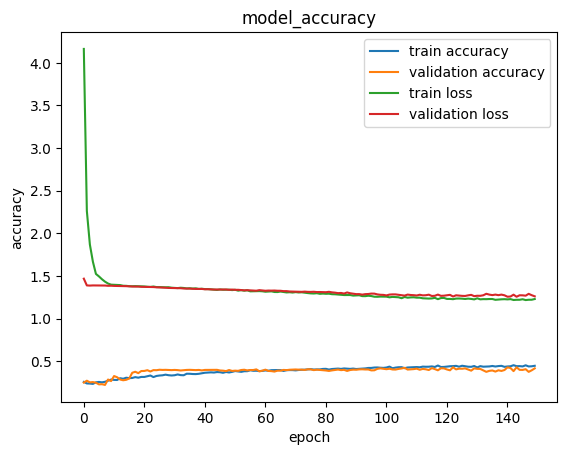

In [181]:
# Final evaluation of the model
loss, accuracy = model.evaluate(x_test, pd.get_dummies(y_test), verbose=1)
#print("Accuracy: ", accuracy*100, "%")

# plot training vs validation for overfiiting
plt.plot(fit.history['accuracy'], label='train accuracy')
plt.plot(fit.history['val_accuracy'], label='validation accuracy')
plt.plot(fit.history['loss'], label='train loss')
plt.plot(fit.history['val_loss'], label='validation loss')
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

### Accuracy of model 2 = 41.5%